In [3]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats
from expyfun.io import write_hdf5, read_hdf5, read_tab
#import cupy
import matplotlib.pyplot as plt
from cycler import cycler

In [4]:
#%% FIG SETTING
dpi = 300
plt.rc('axes', titlesize=10, labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams["font.family"] = "Arial"

In [ ]:
figure_path = '/Users/tongshan/Documents/MusicExp/paper_figs/'

# Figure 2a

In [6]:
df = pd.read_pickle('/Volumes/Elements/AMPLab/MusicExp/preference.pkl')
orig_mean = df[df['category']=='original']['preference'].mean()
orig_sem = df[df['category']=='original']['preference'].std()/np.sqrt(len(df[df['category']=='original']))
chimera_mean = df[df['category']=='chimeric']['preference'].mean()
chimera_sem = df[df['category']=='chimeric']['preference'].std()/np.sqrt(len(df[df['category']=='chimeric']))

In [7]:
df["random_eff"] = df["subject"].astype(str) + "+" + df["group"].astype(int).astype(str)
df_mean = df.groupby(["category","random_eff"])['preference'].mean().reset_index()

df_ori = df_mean[df_mean["category"]=="original"].set_index('random_eff')['preference']
df_chimera = df_mean[df_mean["category"]=="chimeric"].set_index('random_eff')['preference']

stats.ttest_rel(df_ori, df_chimera)


df_mean = df.groupby(["category","subject"])['preference'].mean().reset_index()
df_ori = df_mean[df_mean["category"]=="original"].set_index('subject')['preference']
df_chimera = df_mean[df_mean["category"]=="chimeric"].set_index('subject')['preference']

df_ori_mean = np.mean(df_ori)
df_ori_sem = np.mean(df_ori)/np.sqrt(27)
df_chimera_mean = np.mean(df_chimera)
df_chimera_sem = np.mean(df_chimera)/np.sqrt(27)

stats.ttest_rel(df_ori, df_chimera)

TtestResult(statistic=5.851828982380158, pvalue=3.6108646573034987e-06, df=26)

<Figure size 640x480 with 0 Axes>

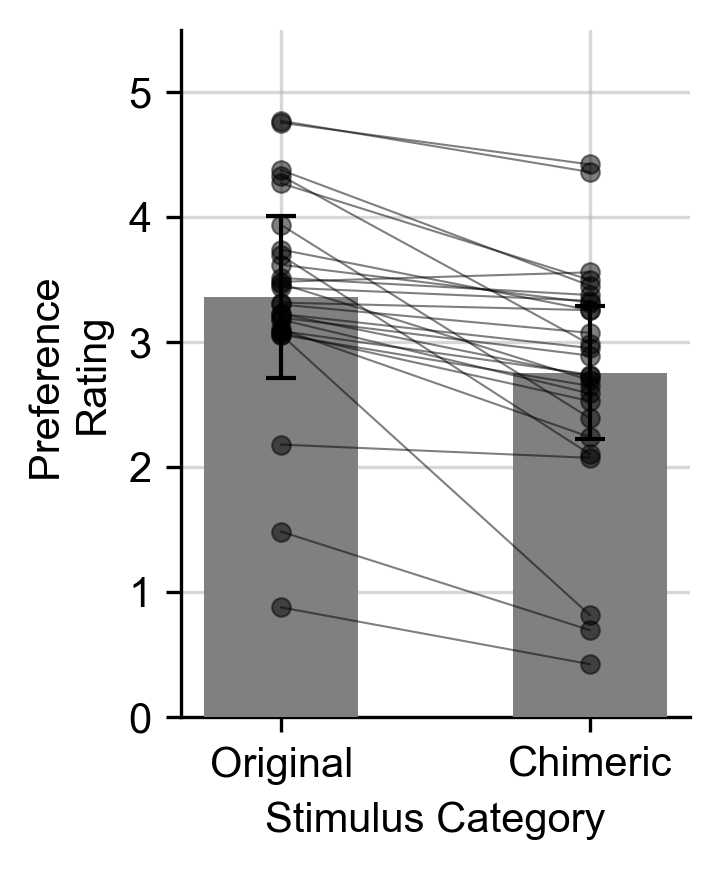

In [19]:
plt.figure()
barWidth = 0.25
br1 = np.arange(0.5,1.5, 0.5)
fig = plt.figure(dpi=dpi)
fig.set_size_inches(2.5, 3)
# Bar plot
plt.bar(br1[0], df_ori_mean, color='grey', width=barWidth, label='Original',zorder=3)
plt.bar(br1[1], df_chimera_mean, color='grey',label='Chimeric', width=barWidth,zorder=3)
plt.errorbar([br1[0],br1[1]], y=[df_ori_mean,df_chimera_mean], yerr=[df_ori_sem,df_chimera_sem],linestyle="", capsize=3.5, color="k",zorder=4,linewidth=1)

# Overlay individual dots
# Assume df_ori and df_chimera are indexed by subject and aligned
for i, (ori, chim) in enumerate(zip(df_ori, df_chimera)):
    plt.scatter(br1[0], ori, s=20, linewidth=0.5, c='k', zorder=5, alpha=0.5, edgecolor='k')
    plt.scatter(br1[1], chim, s=20, linewidth=0.5, c='k', alpha=0.5, zorder=5, edgecolor='k')
    # Optionally, connect paired dots
    plt.plot([br1[0], br1[1]], [ori, chim], color='k', alpha=0.5, linewidth=0.5, zorder=5)

plt.xlabel('Stimulus Category')
plt.ylabel("Preference \nRating")
plt.xticks([r for r in br1], ['Original', 'Chimeric'])
plt.ylim(0, 5.5)
plt.grid(alpha=0.5,zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(figure_path+'preference_dist.svg', dpi=dpi, format='svg')

# Figure 2b

In [20]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin
from scipy.stats import pearsonr
from matplotlib.ticker import ScalarFormatter

In [21]:
exp_path = '/Volumes/TOSHIBA EXT/Chimera/'

In [29]:
subject_list = ['chimera_001','chimera_002', 'chimera_003','chimera_004',
            'chimera_005','chimera_006','chimera_007','chimera_008',
            'chimera_009','chimera_010','chimera_011',
            'chimera_013','chimera_014','chimera_015','chimera_016',
            'chimera_017','chimera_018','chimera_019','chimera_020',
            'chimera_021','chimera_022','chimera_023','chimera_024',
            'chimera_025','chimera_pilot_1_64chn','chimera_pilot_2_64chn']

In [22]:
df = pd.read_csv(exp_path+'expectation_effect_ltm_stm_both_nb_pitch_ioi_linear_model_zscore_reg_individual_pitch-time.csv')
df["random_eff"] = df["subject"].astype(str) + "+" + df["group"].astype(int).astype(str)

In [26]:
subject_group = df.groupby(['subject','category','model','musician'])
mean_subject_group = subject_group.mean(numeric_only=True).reset_index()
mean_ori_A_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'A')]['r'])
mean_ori_both_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both')]['r'])
mean_ori_both_pitch_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both_pitch')]['r'])
mean_ori_both_time_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both_time')]['r'])

mean_chimera_A_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'A')]['r'])
mean_chimera_both_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both')]['r'])
mean_chimera_both_pitch_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both_pitch')]['r'])
mean_chimera_both_time_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both_time')]['r'])


In [23]:
set_group = df.groupby(['random_eff','category','model','musician'])
mean_set_group = set_group.mean().reset_index()
mean_ori_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_ori_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['musician'])
mean_chimera_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_chimera_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['musician'])


mean_ori_A = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['r'])
mean_ori_both = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both')]['r'])
mean_ori_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_ori_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_time')]['r'])

mean_chimera_A = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['r'])
mean_chimera_both = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both')]['r'])
mean_chimera_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_chimera_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_time')]['r'])

#Plot
y=[mean_ori_A.mean(),mean_chimera_A.mean(),
   mean_ori_both.mean(),mean_chimera_both.mean(),
   mean_ori_both_pitch.mean(),mean_chimera_both_pitch.mean(),
   mean_ori_both_time.mean(),mean_chimera_both_time.mean(),]
yerr = [mean_ori_A.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_A.std()/np.sqrt(len(mean_ori_A_group)),
        mean_ori_both.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_both.std()/np.sqrt(len(mean_ori_A_group)),
        mean_ori_both_pitch.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_both_pitch.std()/np.sqrt(len(mean_ori_A_group)),
        mean_ori_both_time.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_both_time.std()/np.sqrt(len(mean_ori_A_group)),]


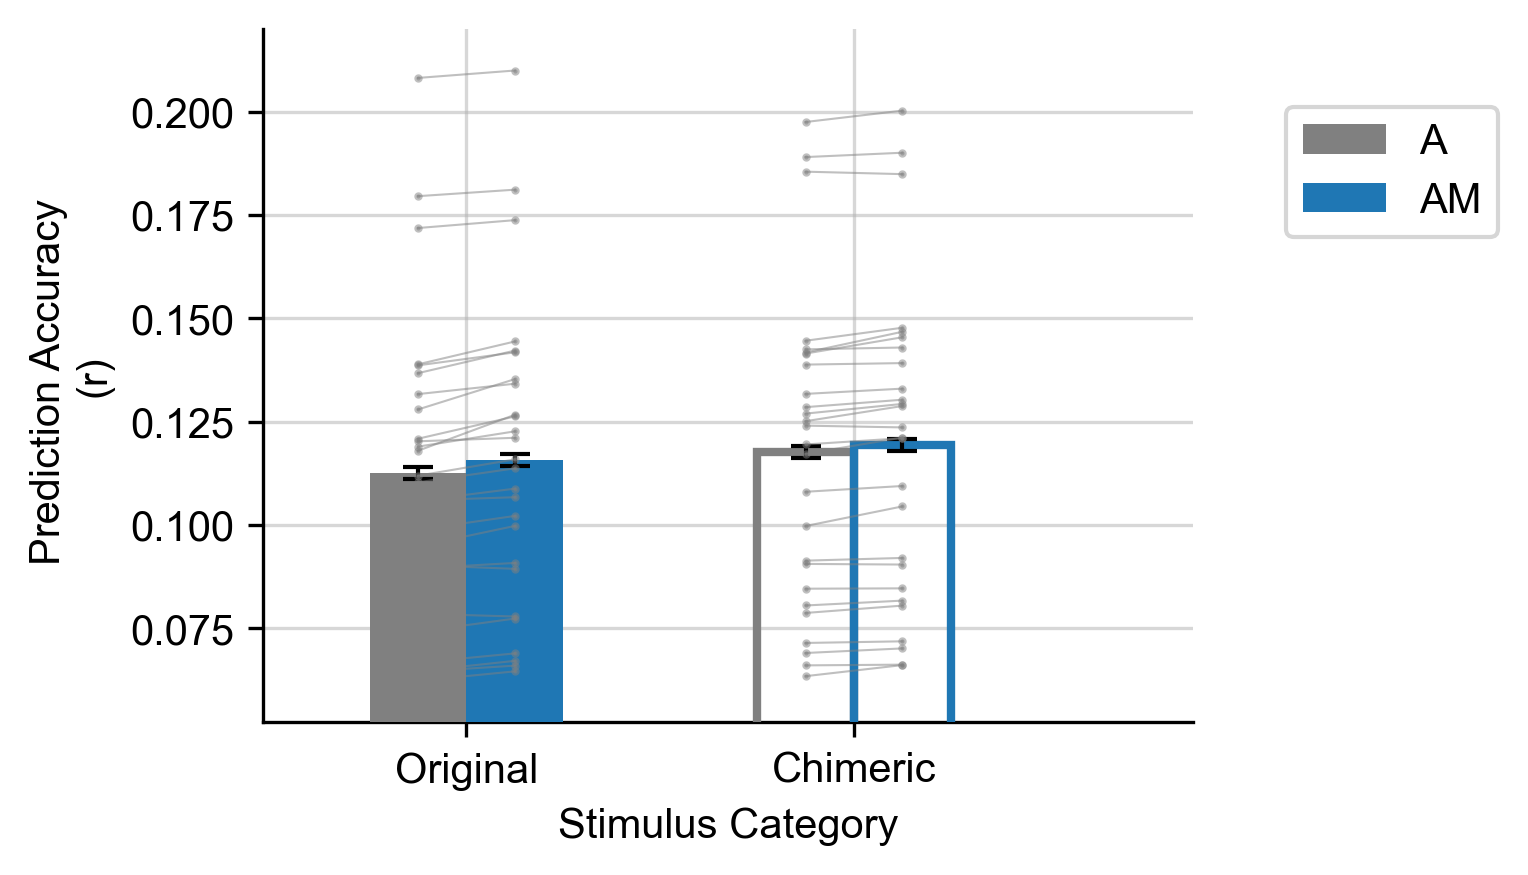

In [31]:
# #### Only the full model
y=[mean_ori_A.mean(),mean_chimera_A.mean(),
   mean_ori_both.mean(),mean_chimera_both.mean(),]
yerr = [mean_ori_A.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_A.std()/np.sqrt(len(mean_ori_A_group)),
        mean_ori_both.std()/np.sqrt(len(mean_ori_A_group)), mean_chimera_both.std()/np.sqrt(len(mean_ori_A_group)),]

barWidth = 0.25
br1 = np.arange(2)
br2 = [x + barWidth for x in br1]

fig = plt.figure(dpi=dpi)
fig.set_size_inches(4, 3)
plt.bar(br1[0], mean_ori_A.mean(), color='grey', width=barWidth, label='A',zorder=3)
plt.bar(br1[1], mean_chimera_A.mean(), edgecolor='grey', fill=False, linewidth=2, width=barWidth,zorder=3)
plt.bar(br2[0], mean_ori_both.mean(), color='C0', width=barWidth, label='AM',zorder=3)
plt.bar(br2[1], mean_chimera_both.mean(),edgecolor='C0', fill=False, linewidth=2, width=barWidth,zorder=3)
plt.errorbar([br1[0],br1[1],br2[0],br2[1]], y=y, yerr=yerr,linestyle="", capsize=3.5, color="k",zorder=4,linewidth=1)
plt.xlabel('Stimulus Category')
plt.ylabel("Prediction Accuracy \n(r)")
#plt.ylim(0.05, 0.225)
plt.ylim(
    min([mean_ori_A_sub.min(), mean_ori_both_sub.min(), mean_chimera_A_sub.min(), mean_chimera_both_sub.min()]) - 0.01,
    max([mean_ori_A_sub.max(), mean_ori_both_sub.max(), mean_chimera_A_sub.max(), mean_chimera_both_sub.max()]) + 0.01
)
plt.xlim(-0.4, 2.0)
plt.xticks([r+barWidth/2 for r in range(2)], ['Original', 'Chimeric'])
for si in range(len(subject_list)):
    plt.plot([br1[0],br2[0]],[mean_ori_A_sub[si],mean_ori_both_sub[si]], ".-", markersize=2, linewidth=0.5, c='grey',zorder=5,alpha=0.5)
    plt.plot([br1[1],br2[1]],[mean_chimera_A_sub[si],mean_chimera_both_sub[si]], ".-", markersize=2,linewidth=0.5, c='grey',zorder=5,alpha=0.5)

lg = plt.legend(fontsize=10, loc=(1.1,0.7))
plt.grid(alpha=0.5,zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(figure_path+'model_prediction_accuracy_r_reg1_zscore_reg_individual_only_both.svg', dpi=dpi, format='svg', bbox_extra_artists=(lg,), bbox_inches='tight')
